In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# ganti path dengan lokasi dataset yang ada
file_path = ('/content/drive/MyDrive/Machine Learning/Dataset/Mall_Customers.csv')

# membaca dataset kedalam dataframe
df = pd.read_csv(file_path)

# menampilkan beberapa baris pertama dari dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
# mengubah nama atribut dalam dataframe
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# menampilkan seluruh informasi dataframe setelah perubahan
print(df.head())

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [48]:
# menghapus kolom customer id dan gender dari dataframe
df = df.drop(['CustomerID', 'Gender'], axis=1)

# menampilkan seluruh informasi dataframe setelah penghapusan
print(df.head())

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

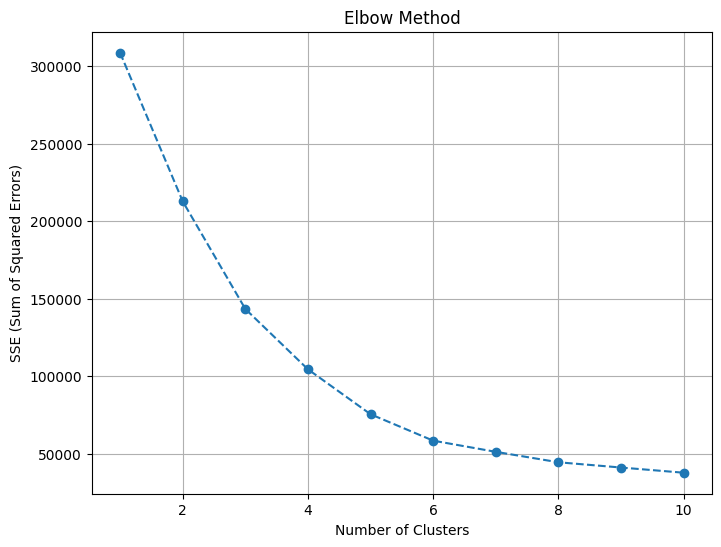

In [49]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi nilai SSE (Sum of Squared Errors)
sse = []

# Range jumlah kluster yang akan diuji
range_clusters = range(1, 11)

# Melakukan analisis elbow method
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


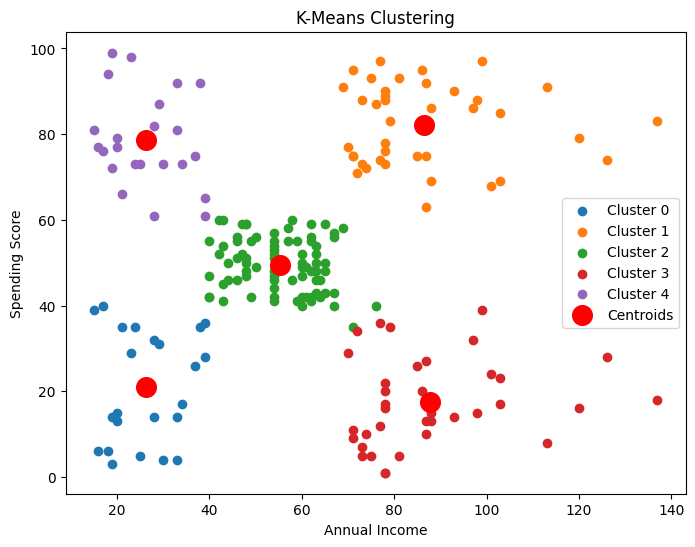

In [50]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means dengan 5 kluster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)

# Menambahkan kolom 'label' ke DataFrame 'df' untuk menunjukkan label kluster
df['label'] = kmeans.labels_

# Memvisualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))

# Memisahkan data berdasarkan label kluster
for label in range(5):
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [51]:
# Range jumlah kluster yang akan diuji
range_clusters = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Melakukan analisis Silhouette Score untuk setiap jumlah kluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil nilai Silhouette Score
for k, score in zip(range_clusters, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score}")

# Mencari nilai k terbaik berdasarkan nilai Silhouette Score
best_k = np.argmax(silhouette_scores) + 2  # +2 karena range dimulai dari 2
print(f"The best k is: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016
The best k is: 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Range jumlah kluster yang akan diuji
range_clusters = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Davies-Bouldin Index Score
davies_bouldin_scores = []

# Melakukan analisis Davies-Bouldin Index Score untuk setiap jumlah kluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    davies_bouldin_score_value = davies_bouldin_score(data, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_score_value)

# Menampilkan hasil nilai Davies-Bouldin Index Score
for k, score in zip(range_clusters, davies_bouldin_scores):
    print(f"Davies-Bouldin Index Score for k={k}: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index Score for k=2: 1.3571023143309133
Davies-Bouldin Index Score for k=3: 0.8748062648492879
Davies-Bouldin Index Score for k=4: 0.8914904209843165
Davies-Bouldin Index Score for k=5: 0.8218781633199781
Davies-Bouldin Index Score for k=6: 0.746974007275528
Davies-Bouldin Index Score for k=7: 0.7863764854525301
Davies-Bouldin Index Score for k=8: 0.8641438876447516
Davies-Bouldin Index Score for k=9: 0.9070119449899816
Davies-Bouldin Index Score for k=10: 0.9573604236246045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
# Mengambil kolom yang akan digunakan untuk analisis klaster
data = df[['Age', 'Annual Income', 'Spending Score']]

# Range jumlah kluster yang akan diuji
range_clusters = range(2, 11)

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index Score
calinski_harabasz_scores = []

# Melakukan analisis Calinski-Harabasz Index Score untuk setiap jumlah kluster
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    calinski_harabasz_score_value = calinski_harabasz_score(data, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz_score_value)

# Menampilkan hasil nilai Calinski-Harabasz Index Score
for k, score in zip(range_clusters, calinski_harabasz_scores):
    print(f"Calinski-Harabasz Index Score for k={k}: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index Score for k=2: 89.28096999467428
Calinski-Harabasz Index Score for k=3: 113.70507138642179
Calinski-Harabasz Index Score for k=4: 127.9838294818919
Calinski-Harabasz Index Score for k=5: 151.04386000160667
Calinski-Harabasz Index Score for k=6: 166.7204931788687
Calinski-Harabasz Index Score for k=7: 162.2852042279988
Calinski-Harabasz Index Score for k=8: 163.58062876554533
Calinski-Harabasz Index Score for k=9: 156.15508760692356
Calinski-Harabasz Index Score for k=10: 152.26426170758603
